# Egg AI project

## Author: Dravyn, Jasmin, Jeff, Oleks

#### Original Dataset: Md Anowar Hossen Faysal, Md Rasel Ahmed, Md Masudur Rahaman

#### Dataset: https://www.kaggle.com/datasets/faysal1998/environmental-effect-on-egg-production
1. Amount_of_chicken: The number of chickens in the farm or enclosure.

2. Amount_of_Feeding: The quantity of food fed to the chickens, likely in kilograms or pounds.

3. Ammonia: Ammonia level in the chicken coop or enclosure. Ammonia is a gas that is produced by the decomposition of chicken waste and can be harmful to chickens in high concentrations.

4. Temperature: The temperature inside the chicken coop or enclosure, measured in degrees Celsius (C).

5. Humidity: The humidity inside the chicken coop or enclosure, measured in percentage.

6. Light_Intensity: The intensity of light in the chicken coop or enclosure.

7. Noise: The noise level in the chicken coop or enclosure, measured in decibels (dB).

8. Total_egg_production: The total number of eggs produced by the chickens.


**Missing Values** <br>
None

# Look at the Big Picture

## Frame the Problem
1. Supervised Learning
2. A regression task
3. Batch Learning
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

In [416]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [417]:
# Download the dataset
url = "https://raw.githubusercontent.com/ItsJJH/egg-ai-project/develop/Egg_Production.csv"
eggs = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
egg_backup = eggs.copy()

In [418]:
# Data cleaning
eggs.drop_duplicates(inplace=True)
eggs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount_of_chicken     74 non-null     int64  
 1   Amount_of_Feeding     74 non-null     int64  
 2   Ammonia               74 non-null     float64
 3   Temperature           74 non-null     float64
 4   Humidity              74 non-null     float64
 5   Light_Intensity       74 non-null     int64  
 6   Noise                 74 non-null     int64  
 7   Total_egg_production  74 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 5.2 KB


In [419]:
eggs

,Amount_of_chicken,Amount_of_Feeding,Ammonia,Temperature,Humidity,Light_Intensity,Noise,Total_egg_production
0,2728,170,14.4,29.3,51.7,364,214,2115
1,2728,175,17.6,29.3,52.3,369,235,1958
2,2728,175,15.0,29.3,52.5,373,237,1990
3,2728,170,15.0,29.3,49.7,372,240,2015
4,2728,170,15.9,29.2,51.4,381,237,2112
...,...,...,...,...,...,...,...,...
69,2721,170,17.9,29.2,50.6,320,209,2015
70,2721,170,14.0,29.2,50.7,310,201,2063
71,2721,190,13.8,29.1,53.1,318,81,2065
72,2721,190,14.3,29.1,54.1,318,81,2050


In [420]:
eggs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount_of_chicken     74 non-null     int64  
 1   Amount_of_Feeding     74 non-null     int64  
 2   Ammonia               74 non-null     float64
 3   Temperature           74 non-null     float64
 4   Humidity              74 non-null     float64
 5   Light_Intensity       74 non-null     int64  
 6   Noise                 74 non-null     int64  
 7   Total_egg_production  74 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 5.2 KB


In [421]:
max_row = eggs[eggs['Total_egg_production'] == eggs['Total_egg_production'].max()].copy()
max_row

,Amount_of_chicken,Amount_of_Feeding,Ammonia,Temperature,Humidity,Light_Intensity,Noise,Total_egg_production
33,2744,190,14.1,31.0,52.4,312,191,2271


In [422]:
min_row = eggs[eggs['Total_egg_production'] == eggs['Total_egg_production'].min()].copy()
min_row

,Amount_of_chicken,Amount_of_Feeding,Ammonia,Temperature,Humidity,Light_Intensity,Noise,Total_egg_production
15,2673,180,16.3,29.1,48.8,311,195,1479


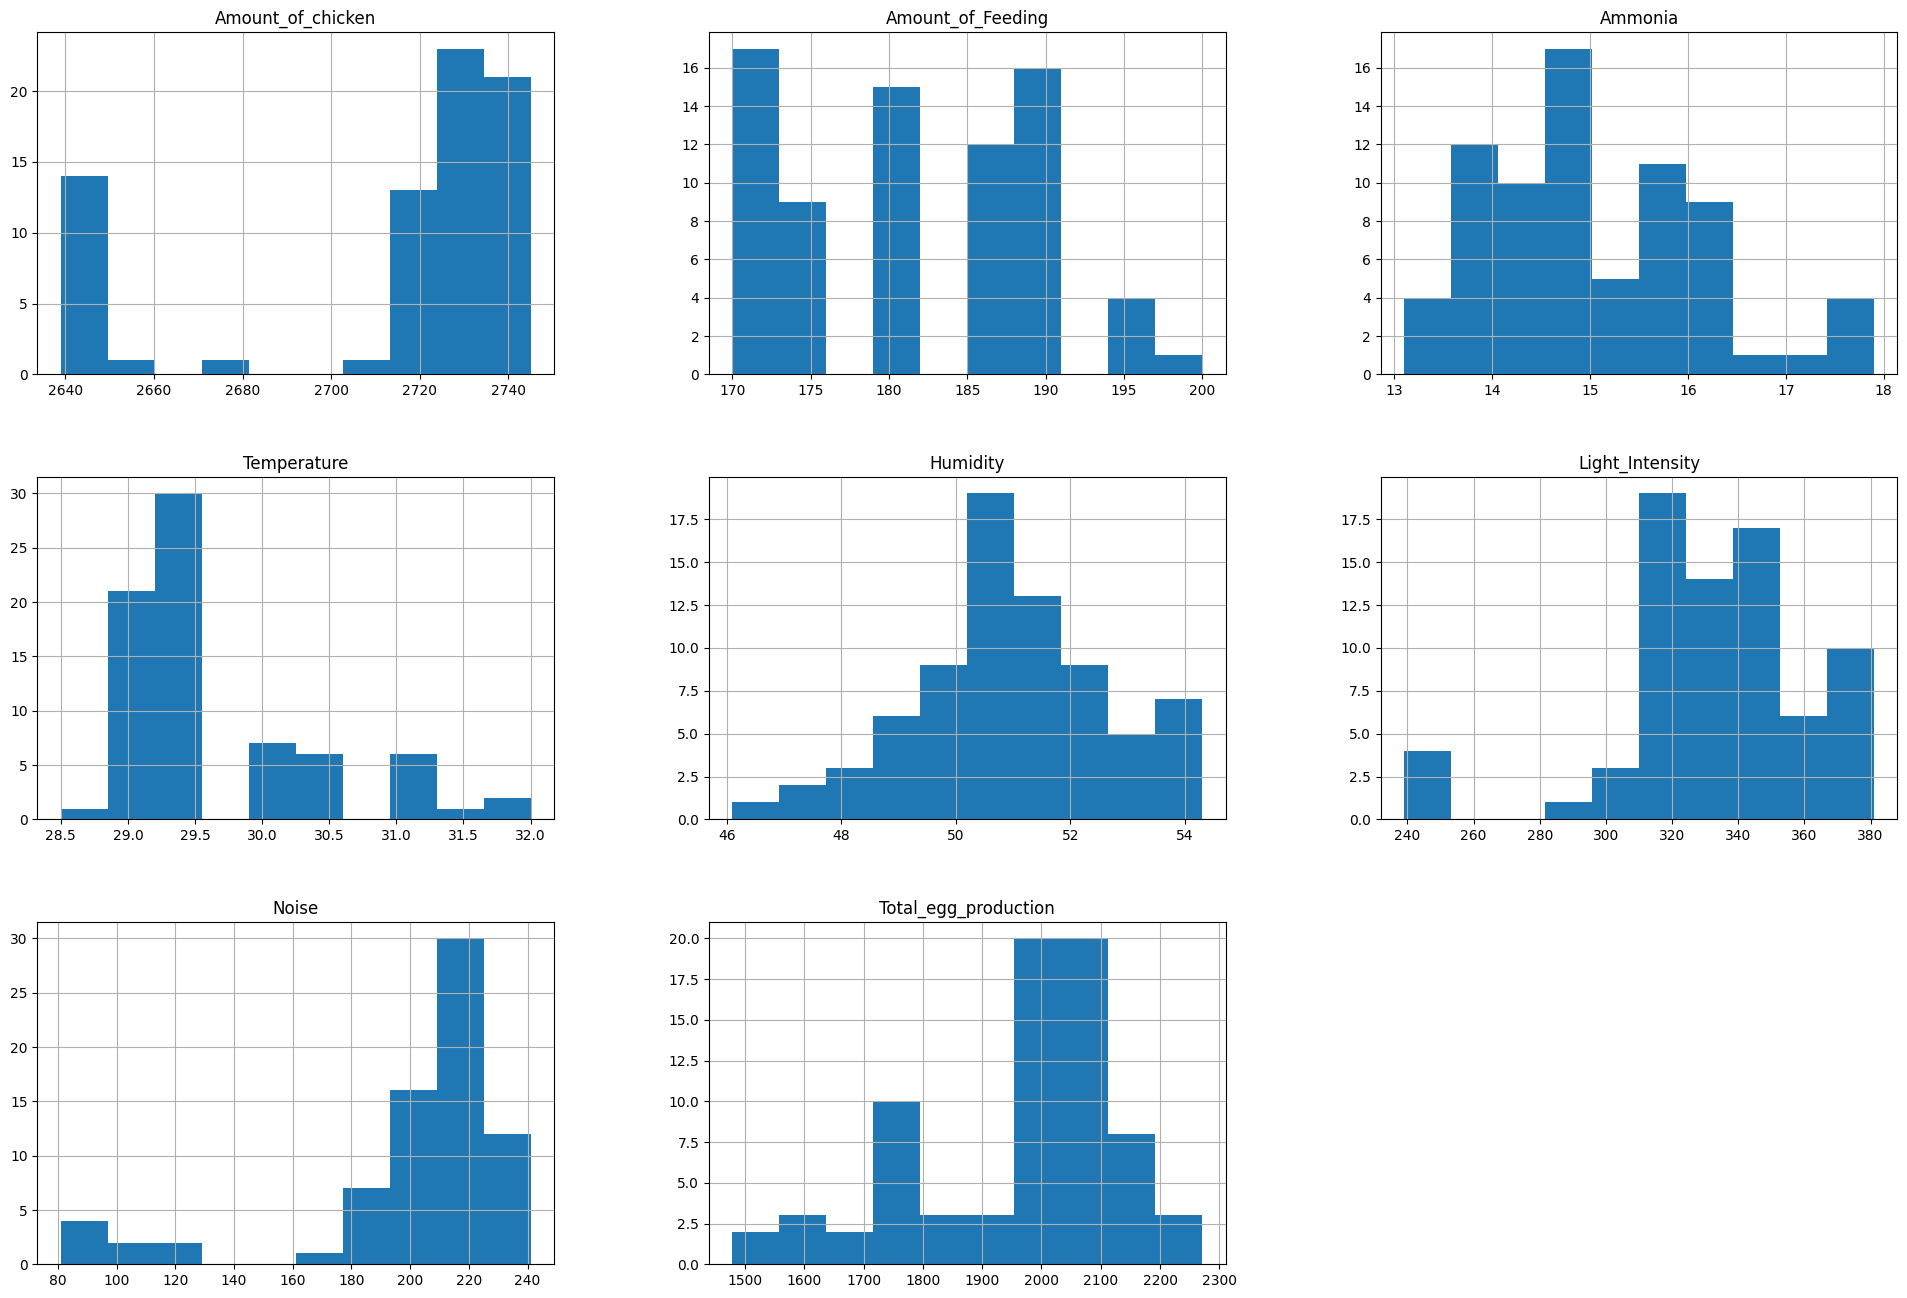

In [423]:
# Graph 1 - The Histogram
eggs.hist(figsize=(24, 16))
plt.show()

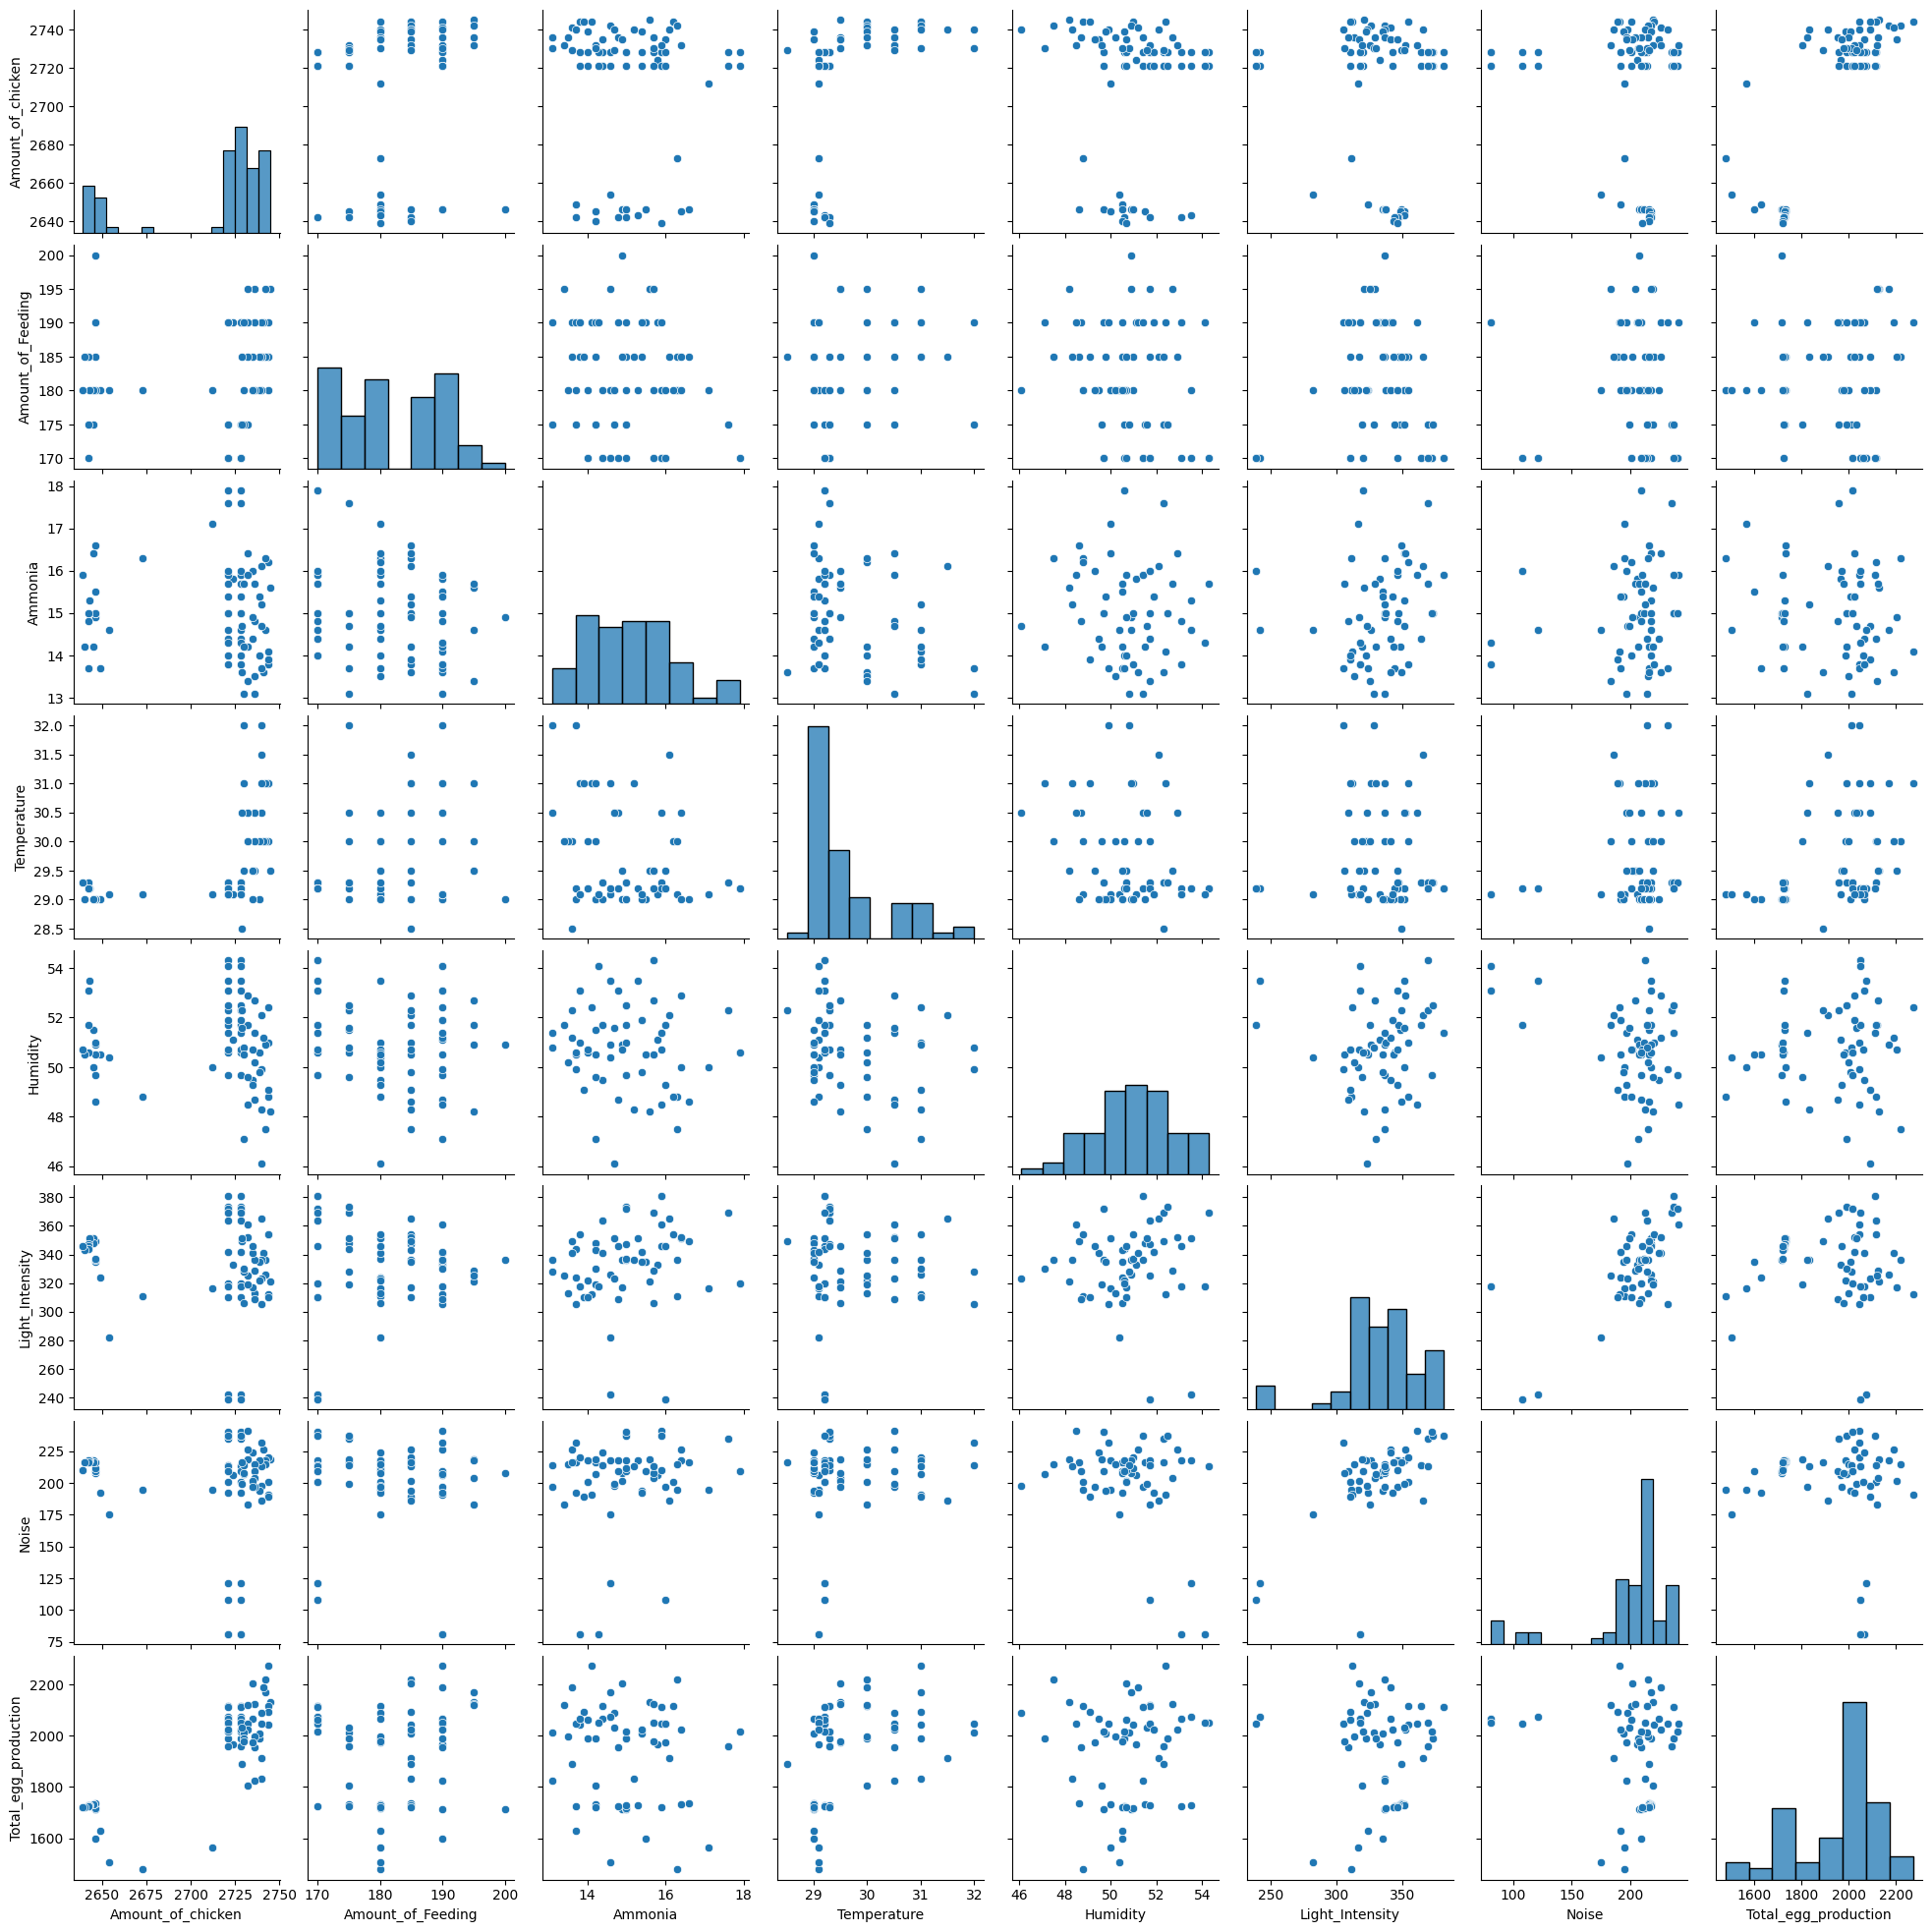

In [424]:
# Graph 2 - The Pairplot
sns.pairplot(eggs)

# Pipeline

In [425]:
# Import libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler # Redundant

In [426]:
#
# Not turning to list doesn't seem to change functionality for line 6
#

# Store columns into list
num_cols = eggs.select_dtypes(include='number').columns

# Select MinMaxScaler
SCALER = MinMaxScaler()

# Make pipeline
num_pipeline = make_pipeline('num', SCALER, num_cols)

# Create preprocessing
preprocessing = ColumnTransformer([num_pipeline], remainder='passthrough')

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[Pipeline(steps=[('num', 'num'),
                                                ('minmaxscaler',
                                                 MinMaxScaler()),
                                                ('index',
                                                 Index(['Amount_of_chicken', 'Amount_of_Feeding', 'Ammonia', 'Temperature',
       'Humidity', 'Light_Intensity', 'Noise', 'Total_egg_production'],
      dtype='object'))])])

In [427]:
# Fit and transform dataframe
eggs_scaled = preprocessing.fit_transform(eggs)

# Prepare new data set
feature_names = preprocessing.get_feature_names_out()
eggs_prepared = pd.DataFrame(data=eggs_scaled, columns=feature_names)

eggs_prepared

,num__Amount_of_chicken,num__Amount_of_Feeding,num__Ammonia,num__Temperature,num__Humidity,num__Light_Intensity,num__Noise,num__Total_egg_production
0,0.839623,0.000000,0.270833,0.228571,0.682927,0.880282,0.83125,0.803030
1,0.839623,0.166667,0.937500,0.228571,0.756098,0.915493,0.96250,0.604798
2,0.839623,0.166667,0.395833,0.228571,0.780488,0.943662,0.97500,0.645202
3,0.839623,0.000000,0.395833,0.228571,0.439024,0.936620,0.99375,0.676768
4,0.839623,0.000000,0.583333,0.200000,0.646341,1.000000,0.97500,0.799242
...,...,...,...,...,...,...,...,...
69,0.773585,0.000000,1.000000,0.200000,0.548780,0.570423,0.80000,0.676768
70,0.773585,0.000000,0.187500,0.200000,0.560976,0.500000,0.75000,0.737374
71,0.773585,0.666667,0.145833,0.171429,0.853659,0.556338,0.00000,0.739899
72,0.773585,0.666667,0.250000,0.171429,0.975610,0.556338,0.00000,0.720960


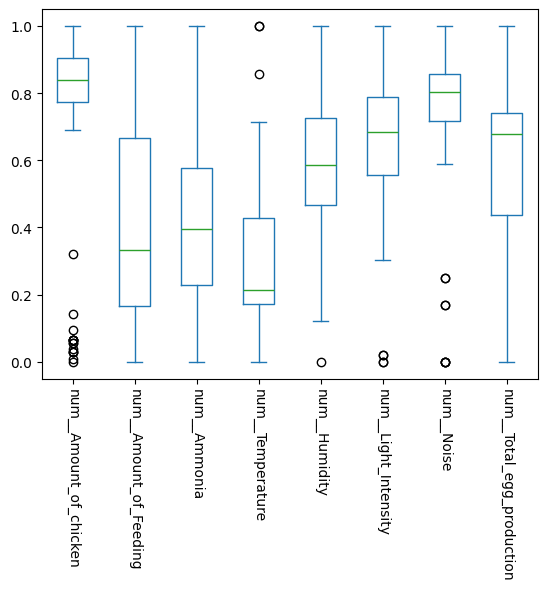

In [428]:
# Graph 3 - The Boxplot
eggs_prepared.plot.box()
plt.xticks(rotation = -90)
plt.show()

In [429]:
# Verifying that df has been scaled properly
print(eggs_prepared.min(), '\n')
print(eggs_prepared.max())

num__Amount_of_chicken       0.0
num__Amount_of_Feeding       0.0
num__Ammonia                 0.0
num__Temperature             0.0
num__Humidity                0.0
num__Light_Intensity         0.0
num__Noise                   0.0
num__Total_egg_production    0.0
dtype: float64 

num__Amount_of_chicken       1.0
num__Amount_of_Feeding       1.0
num__Ammonia                 1.0
num__Temperature             1.0
num__Humidity                1.0
num__Light_Intensity         1.0
num__Noise                   1.0
num__Total_egg_production    1.0
dtype: float64


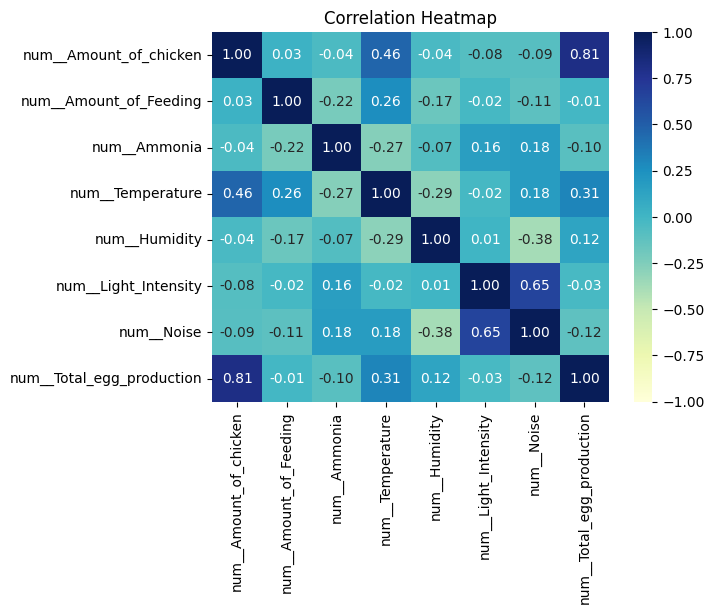

In [430]:
# Making Correlation Heatmap

RANGE_MAX = 1
RANGE_MIN = -1      # Turn into None type for higher contrast

corr_matrix = eggs_prepared.corr()

sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt='.2f', vmin=RANGE_MIN, vmax=RANGE_MAX)
plt.title('Correlation Heatmap')
plt.show()

In [431]:
corr_matrix["num__Total_egg_production"].sort_values(ascending=False)

num__Total_egg_production    1.000000
num__Amount_of_chicken       0.810808
num__Temperature             0.311872
num__Humidity                0.120340
num__Amount_of_Feeding      -0.011042
num__Light_Intensity        -0.031182
num__Ammonia                -0.098338
num__Noise                  -0.122887
Name: num__Total_egg_production, dtype: float64

In [432]:
corr_matrix1 = egg_backup.corr()
corr_matrix1["Total_egg_production"].sort_values(ascending=False)
#egg_backup.info()

Total_egg_production    1.000000
Amount_of_chicken       0.815505
Temperature             0.393982
Amount_of_Feeding       0.085183
Humidity                0.054580
Light_Intensity        -0.025395
Noise                  -0.083421
Ammonia                -0.122824
Name: Total_egg_production, dtype: float64

### Splitting Dataset into Train/Validation/Test Sets

In [433]:
VALIDATION_SIZE =  0.2
TEST_SIZE = 0
TRAIN_SIZE = 1 - VALIDATION_SIZE - TEST_SIZE
SEED = 1234567890 # Make None type to Randomize

In [434]:
eggs.isna().sum()

Amount_of_chicken       0
Amount_of_Feeding       0
Ammonia                 0
Temperature             0
Humidity                0
Light_Intensity         0
Noise                   0
Total_egg_production    0
dtype: int64

In [435]:
from sklearn.model_selection import train_test_split

X = eggs_prepared.drop(["num__Total_egg_production"], axis=1) # it's not a feature but a target
y = eggs_prepared["num__Total_egg_production"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                      test_size=VALIDATION_SIZE, 
                                      train_size=TRAIN_SIZE, 
                                      random_state=SEED, 
                                      shuffle=True)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(59, 7) (59,) (15, 7) (15,)


# Models

In [560]:
# Define utility functions for later!

################################### Rangeplot ###################################
# Takes 2 np.ndarray's of numbers and makes a rangeplot with their differences
# Takes optional title

def make_rangeplot(predictions: np.ndarray, actual_values=y_test, title='', x_labels=None):
    bottoms = np.minimum(predictions, actual_values)
    tops = np.maximum(predictions, actual_values)

    diff = np.subtract(tops, bottoms)

    x = np.arange(len(bottoms))
    ax = plt.gca()
    # ax.set_ylim([0, 1])
    ax.bar(x, diff, bottom=bottoms)
    plt.ylabel('Prediction Value')
    plt.xlabel('Prediction Number')
    plt.xticks(x, x_labels, rotation ='vertical') 
    title += ' Rangeplot'
    plt.title(title)

############################# Scatterplot #######################################
# Takes 2 np.ndarray's of numbers and makes a scatterplot comparing predictions to actual values
    
def make_scatterplot(pred_values: np.ndarray, act_values=y_test, title=''):
    plt.scatter(pred_values, act_values)  # y is your actual target values
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    title += " Predicted vs. Actual Values"
    plt.title(title)
    plt.axline((0, 0), slope=1)
    plt.show()

############################## Print Stats ######################################
# Takes predictions and actual values, and prints MSE, MAE, and R^2 values

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def print_stats(pred_values: np.ndarray, act_values=y_test):
    print(f'Mean Squared Error:\t\t{mean_squared_error(act_values, pred_values):.5f}')           # Lower better
    print(f'Mean Absolute Error:\t\t{mean_absolute_error(act_values, pred_values):.5f}\n')       # Lower better
    print(f'Coefficient of Determination:   {r2_score(act_values, pred_values):.5f}')            # Higher better

### Linear Regression using standard split

In [561]:
# Run linear regression on our model
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train, y_train)

lin_pred = lin_reg_model.predict(X_test)

In [562]:
print_stats(lin_pred)

Mean Squared Error:		0.02300
Mean Absolute Error:		0.12168

Coefficient of Determination:   0.29672


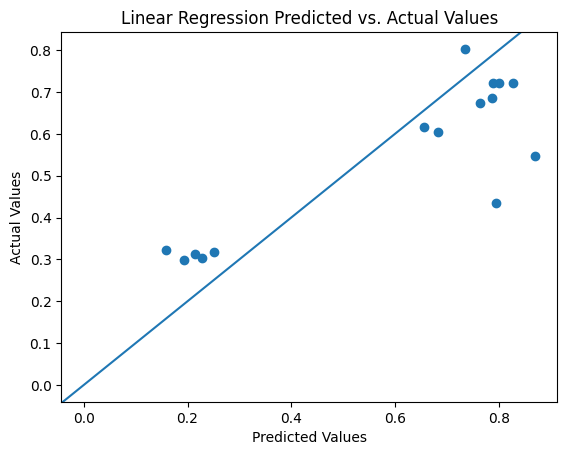

In [563]:
make_scatterplot(lin_pred, title='Linear Regression')

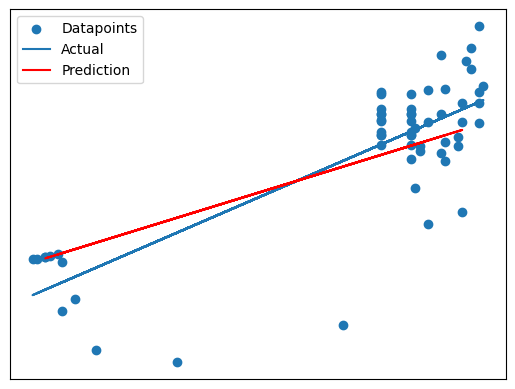

In [564]:
plt.scatter(X_train['num__Amount_of_chicken'], y_train)

# Line of best fit for actual
a, b = np.polyfit(X_train['num__Amount_of_chicken'], y_train, 1)
plt.plot(X_train['num__Amount_of_chicken'], a*X_train['num__Amount_of_chicken']+b)

# Line of best fit for predictions
a, b = np.polyfit(X_test['num__Amount_of_chicken'], y_test, 1)
plt.plot(X_test['num__Amount_of_chicken'], a*X_test['num__Amount_of_chicken']+b, color='red')

# Graph settings
plt.xticks(())
plt.yticks(())
plt.legend(['Datapoints','Actual', 'Prediction'])

plt.show()


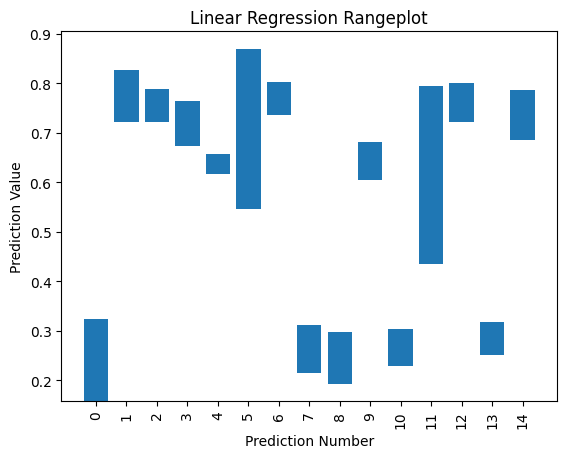

In [565]:
make_rangeplot(lin_pred, y_test, 'Linear Regression')

### Gradient Boosting Regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#:~:text=Gradient%20Boosting%20for%20regression.,of%20the%20given%20loss%20function.

In [566]:
# Run GBR on our data
from sklearn.ensemble import GradientBoostingRegressor

grad_boosting_model = GradientBoostingRegressor()

grad_boosting_model.fit(X_train, y_train)

grad_pred = grad_boosting_model.predict(X_test)

print_stats(grad_pred)

Mean Squared Error:		0.01270
Mean Absolute Error:		0.05360

Coefficient of Determination:   0.61159


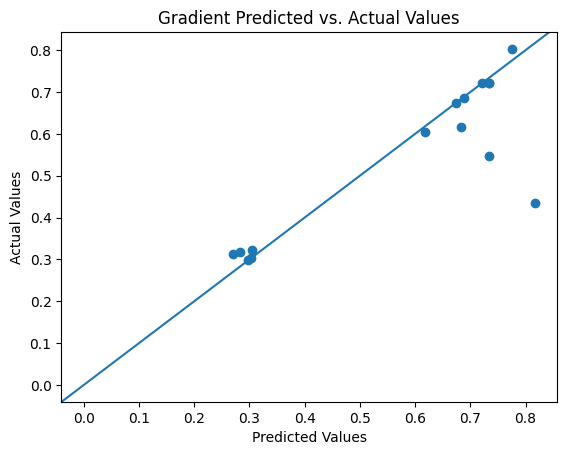

In [567]:
make_scatterplot(grad_pred, y_test, 'Gradient')

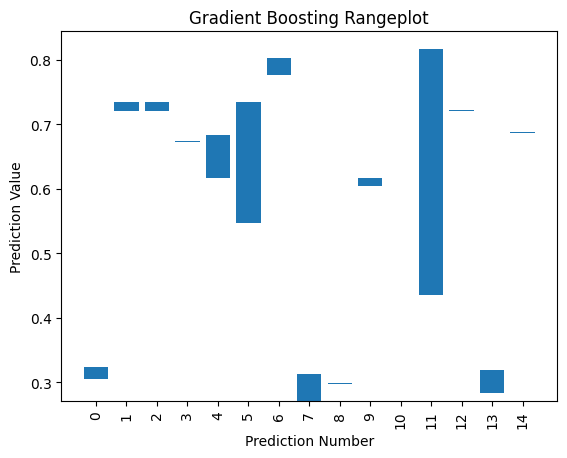

In [568]:
make_rangeplot(grad_pred, y_test, 'Gradient Boosting')

### Random Forest Regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [569]:
from sklearn.ensemble import RandomForestRegressor

# Run forest regression model on our data
rand_forest_model = RandomForestRegressor()

rand_forest_model.fit(X_train, y_train)

rand_forest_pred = rand_forest_model.predict(X_test)

print_stats(rand_forest_pred)

Mean Squared Error:		0.00871
Mean Absolute Error:		0.05240

Coefficient of Determination:   0.73354


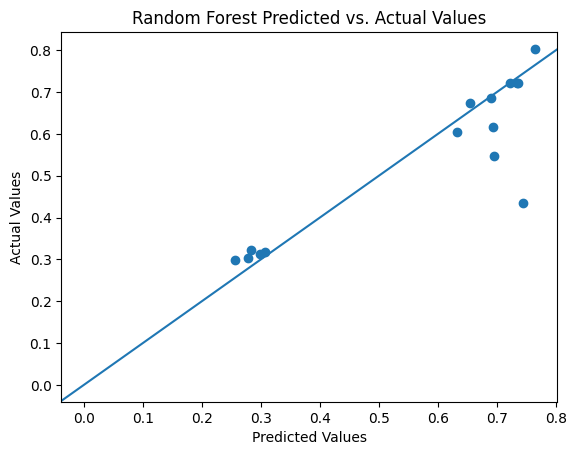

In [581]:
make_scatterplot(rand_forest_pred, title='Random Forest')

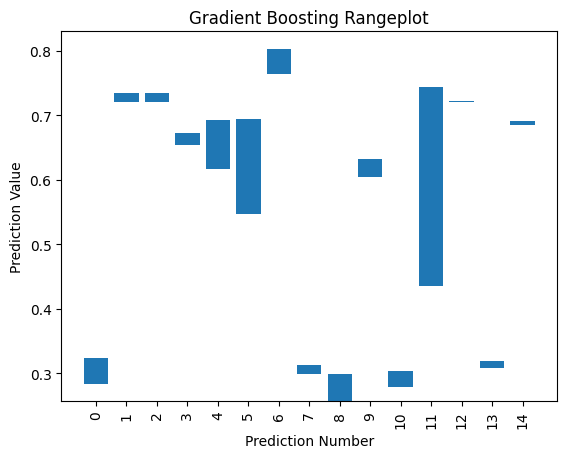

In [571]:
make_rangeplot(rand_forest_pred, title='Gradient Boosting')

# Report

Method to undo fit_transform to get actual egg predictions

In [572]:
# Returns actual predictions, with the pipeline scaling undone
def undo_scaling(scaled_values:np.ndarray) -> np.ndarray:
    reshaped = np.reshape(scaled_values, (-1,1))
    sc = num_pipeline[1]                                                        # Gets the applied scalar
    sc = SCALER.fit(np.reshape(eggs['Total_egg_production'], (-1,1)))          # Idk what happens, but it sometimes breaks without this line
    return sc.inverse_transform(reshaped).flatten().astype(np.int64)

In [573]:
# Unscaling each values from our predictions
act_values = undo_scaling(y_test)
lin_pred_values = undo_scaling(lin_pred)
grad_pred_values = undo_scaling(grad_pred)
rand_forest_pred_values = undo_scaling(rand_forest_pred)

print(act_values)

print(lin_pred_values)
print(grad_pred_values)
print(rand_forest_pred_values)

[1735 2050 2050 2012 1967 1912 2115 1726 1715 1958 1719 1823 2050 1731
 2022]
[1604 2134 2103 2084 1999 2167 2061 1648 1631 2019 1659 2108 2113 1677
 2102]
[1719 2060 2060 2013 2019 2060 2093 1693 1714 1967 1719 2125 2050 1703
 2024]
[1703 2060 2061 1997 2028 2029 2084 1715 1682 1980 1698 2067 2051 1722
 2026]


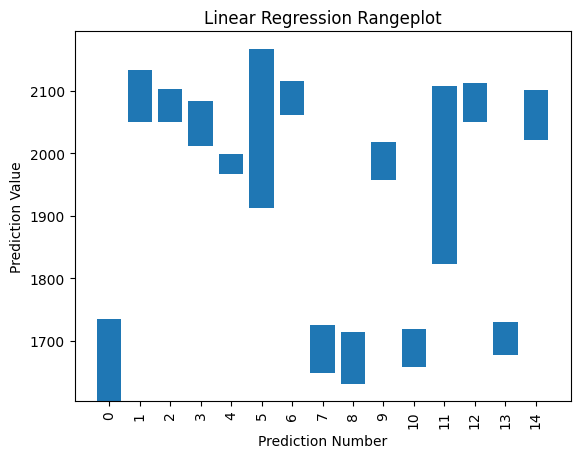

In [574]:
make_rangeplot(lin_pred_values, act_values, 'Linear Regression')

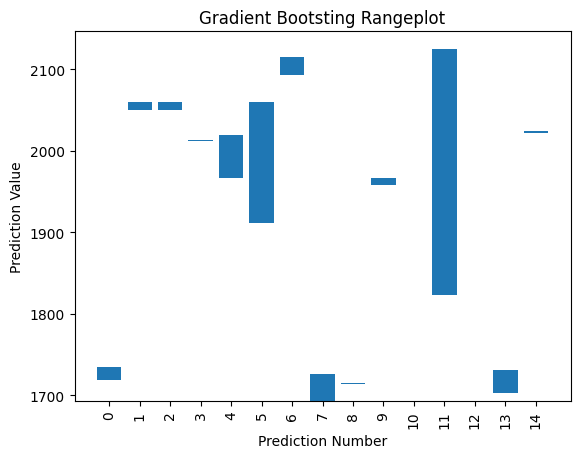

In [575]:
make_rangeplot(grad_pred_values, act_values, 'Gradient Bootsting')

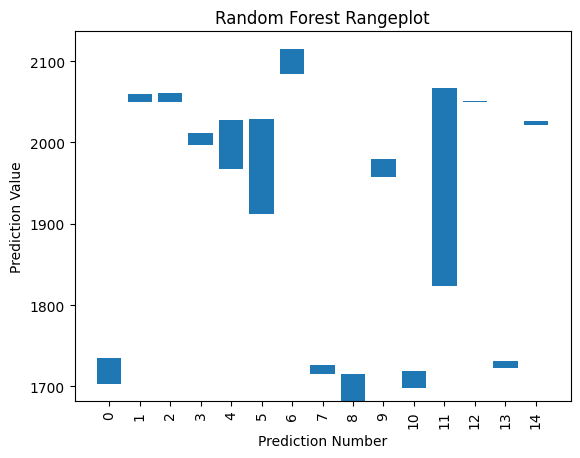

In [576]:
make_rangeplot(rand_forest_pred_values, act_values, 'Random Forest')

In [577]:
# Print MSE, MAE, and Coefficients of each algorithm.
print("Linear Regression Stats")
print_stats(lin_pred)
print('---------------------------------------')
print("Gradient Boosting Regression Stats")
print_stats(grad_pred)
print('---------------------------------------')
print("Random Forest Regression Stats")
print_stats(rand_forest_pred)

Linear Regression Stats
Mean Squared Error:		0.02300
Mean Absolute Error:		0.12168

Coefficient of Determination:   0.29672
---------------------------------------
Gradient Boosting Regression Stats
Mean Squared Error:		0.01270
Mean Absolute Error:		0.05360

Coefficient of Determination:   0.61159
---------------------------------------
Random Forest Regression Stats
Mean Squared Error:		0.00871
Mean Absolute Error:		0.05240

Coefficient of Determination:   0.73354


In [578]:
X_test

,num__Amount_of_chicken,num__Amount_of_Feeding,num__Ammonia,num__Temperature,num__Humidity,num__Light_Intensity,num__Noise
22,0.066038,0.500000,0.729167,0.142857,0.304878,0.774648,0.84375
11,0.839623,0.666667,0.250000,0.171429,0.975610,0.556338,0.00000
72,0.773585,0.666667,0.250000,0.171429,0.975610,0.556338,0.00000
56,0.858491,0.166667,0.000000,1.000000,0.573171,0.626761,0.83125
13,0.801887,0.666667,0.562500,0.171429,0.609756,0.661972,0.78125
41,0.952830,0.500000,0.625000,0.857143,0.731707,0.887324,0.65625
0,0.839623,0.000000,0.270833,0.228571,0.682927,0.880282,0.83125
28,0.028302,0.166667,0.125000,0.200000,0.548780,0.739437,0.84375
20,0.066038,0.666667,0.395833,0.142857,0.439024,0.683099,0.80000
62,0.773585,0.166667,0.937500,0.228571,0.756098,0.915493,0.96250


In [579]:
egg_backup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount_of_chicken     481 non-null    int64  
 1   Amount_of_Feeding     481 non-null    int64  
 2   Ammonia               481 non-null    float64
 3   Temperature           481 non-null    float64
 4   Humidity              481 non-null    float64
 5   Light_Intensity       481 non-null    int64  
 6   Noise                 481 non-null    int64  
 7   Total_egg_production  481 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 30.2 KB
